In [1]:
import pickle

with open('../model/data/paradeigma_ts_data_preprocessing.pkl', 'rb') as f:
    target_data_frames = pickle.load(f)

In [5]:
target_data_frames[1].keys()

Index(['segment_id', 'emotion', 'valence', 'arousal', 'eda', 'temp', 'ibi'], dtype='object')

In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

num_sessions = 40

eva_df = pd.DataFrame(columns = ['emotion', 'valence', 'arousal'])
for session in range(num_sessions):
    
    emotion = target_data_frames[session+1]['emotion']
    valence = target_data_frames[session+1]['valence']
    arousal = target_data_frames[session+1]['arousal']
    
    new_df = pd.DataFrame([emotion, valence, arousal]).T
    eva_df = e_v_a_df.append(new_df, ignore_index = True)

In [33]:
eva_df

,emotion,valence,arousal
0,neutral,3.4,2.9
1,neutral,3.1,2.9
2,neutral,3.1,3
3,neutral,3.7,3.1
4,neutral,3.8,2.8
...,...,...,...
13955,neutral,3,3.5
13956,neutral,2.9,3.1
13957,neutral,2.6,3.6
13958,neutral,2.7,3.3


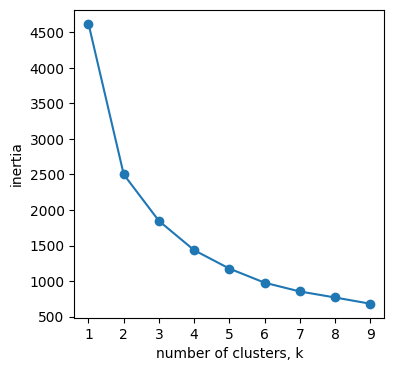

In [34]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(eva_df[['valence', 'arousal']])
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()   

In [40]:
for i in raneva_df['emotion']

0        neutral
1        neutral
2        neutral
3        neutral
4        neutral
          ...   
13955    neutral
13956    neutral
13957    neutral
13958    neutral
13959    neutral
Name: emotion, Length: 13960, dtype: object

In [39]:
eva_df['emotion'][';' in eva_df['emotion']]

KeyError: False

In [44]:
'ab;cde'.count(';')

1

In [54]:
several_target_index = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
several_target_counter = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}

for i in range(len(eva_df['emotion'])):
    several_target_index[eva_df['emotion'][i].count(';') + 1].append(i)
    several_target_counter[eva_df['emotion'][i].count(';') + 1]+= 1

In [55]:
several_target_counter

{1: 13306, 2: 646, 3: 7, 4: 0, 5: 1, 6: 0, 7: 0}

In [56]:
eva_df.iloc[several_target_index[1]]

,emotion,valence,arousal
0,neutral,3.4,2.9
1,neutral,3.1,2.9
2,neutral,3.1,3.0
3,neutral,3.7,3.1
4,neutral,3.8,2.8
...,...,...,...
13955,neutral,3.0,3.5
13956,neutral,2.9,3.1
13957,neutral,2.6,3.6
13958,neutral,2.7,3.3


In [35]:
eva_df['valence'] = eva_df['valence'].apply(lambda x: float(x))
eva_df['arousal'] = eva_df['arousal'].apply(lambda x: float(x))

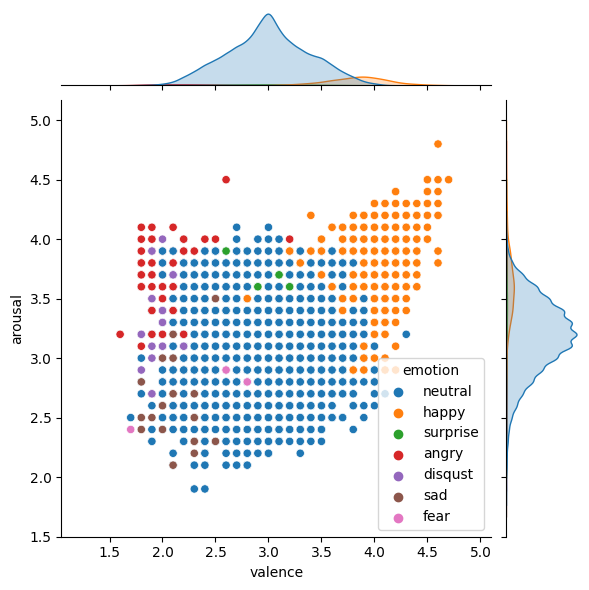

In [58]:
sns.jointplot(x='valence', y='arousal', data=eva_df.iloc[several_target_index[1]], hue='emotion')